<a href="https://colab.research.google.com/github/sundaybest3/Spring2024/blob/main/Corpus/Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌿 Topics:

## 1. Type vs. Token
## 2. **Lexical Diversity measures (10 types)**

## Getting LD indices

+ **TTR (Type-Token Ratio)**: Measures the ratio of the number of unique words (types) to the total number of words (tokens) in a text, indicating vocabulary diversity. *Reference: (Richards, 1987)*

+ **RTTR (Root Type-Token Ratio)**: An adaptation of TTR that takes the square root of the number of tokens to reduce the impact of text length. *Reference: (Guiraud, 1954)*

+ **LogTTR (Logarithmic Type-Token Ratio)**: A measure that involves taking the logarithm of the number of types and dividing it by the logarithm of the number of tokens. *Reference: (Herdan, 1960)*

+ **MassTTR**: A lexical diversity measure accounting for the number of different words in large segments of the text. *Reference: (Covington & McFall, 2010)*

+ **MSTTR (Mean Segmental Type-Token Ratio)**: Calculates TTR for multiple segments of a given length within the text and averages the results. *Reference: (Johnson, 1944)*

+ **MATTR (Moving-Average Type-Token Ratio)**: A measure that calculates TTR over a moving window, averaging the TTR values across the text. *Reference: (Covington & McFall, 2010)*

+ **HDD (Hypergeometric Distribution D)**: Estimates the probability of encountering new types in a sample of text, based on a hypergeometric distribution. *Reference: (McCarthy & Jarvis, 2007)*

+ **MTLD (Measure of Textual Lexical Diversity)**: Measures lexical diversity by dividing the text into segments and calculating the average length at which a certain TTR level is maintained. *Reference: (McCarthy, 2005)*

+ **MTLD_wrap**: A variant of MTLD that wraps around to the beginning of the text when it reaches the end, for a more comprehensive analysis. *Reference: (McCarthy, 2005)*

+ **MTLD_bid (Bi-directional MTLD)**: An extension of MTLD that calculates lexical diversity in both forward and reverse directions in the text. *Reference: (McCarthy, 2005)*


## Read data file from Github, Add string length, Number of splitted words (N_Splits)

+ data from https://github.com/MK316/Workingpapers/blob/main/Analysis/ksatdata_12only.csv
+ Raw data: https://raw.githubusercontent.com/MK316/Workingpapers/main/Analysis/ksatdata_12only.csv (12 only, Q41 removed)

In [27]:
import pandas as pd

In [28]:
url = 'https://raw.githubusercontent.com/sundaybest3/Spring2024/main/Corpus/the_little_prince.csv'
df1 = pd.read_csv(url)

In [7]:
#df1.to_csv('/content/mydata.csv', sep=',', na_rep='NaN')
#import chardet
#with open('/content/ksatdata_item17.csv', 'rb') as f:
#     enc = chardet.detect(f.read())
#df1 = pd.read_csv('/content/ksatdata_item17.csv', encoding=enc['encoding'])

In [29]:
df1

,chapter,content
0,1,Once when I was six years old I saw a magnific...
1,2,"So I lived my life alone, without anyone that ..."
2,3,It took me a long time to learn where he came ...
3,4,I had thus learned a second fact of great impo...
4,5,"As each day passed I would learn, in our talk,..."
5,6,"Oh, little prince! Bit by bit I came to unders..."
6,7,"On the fifth day--again, as always, it was tha..."
7,8,I soon learned to know this flower better. On ...
8,9,I believe that for his escape he took advantag...
9,10,He found himself in the neighborhood of the as...


# Adding a column with length info

In [30]:
df2 = df1

In [31]:
# Added column: String length
length = []

for i in range(0, len(df2['content'])):
  LEN = len(df2['content'][i])
  length.append(LEN)

df2['String'] = length
df2

,chapter,content,String
0,1,Once when I was six years old I saw a magnific...,2814
1,2,"So I lived my life alone, without anyone that ...",4021
2,3,It took me a long time to learn where he came ...,2346
3,4,I had thus learned a second fact of great impo...,4748
4,5,"As each day passed I would learn, in our talk,...",4465
5,6,"Oh, little prince! Bit by bit I came to unders...",1249
6,7,"On the fifth day--again, as always, it was tha...",4424
7,8,I soon learned to know this flower better. On ...,4314
8,9,I believe that for his escape he took advantag...,2409
9,10,He found himself in the neighborhood of the as...,6880


In [32]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df2['content'])):
  TSP = df2['content'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df2['Splits'] = tsplit
df2['N_Splits'] = splen
df2

,chapter,content,String,Splits,N_Splits
0,1,Once when I was six years old I saw a magnific...,2814,"[Once, when, I, was, six, years, old, I, saw, ...",513
1,2,"So I lived my life alone, without anyone that ...",4021,"[So, I, lived, my, life, alone,, without, anyo...",778
2,3,It took me a long time to learn where he came ...,2346,"[It, took, me, a, long, time, to, learn, where...",452
3,4,I had thus learned a second fact of great impo...,4748,"[I, had, thus, learned, a, second, fact, of, g...",897
4,5,"As each day passed I would learn, in our talk,...",4465,"[As, each, day, passed, I, would, learn,, in, ...",848
5,6,"Oh, little prince! Bit by bit I came to unders...",1249,"[Oh,, little, prince!, Bit, by, bit, I, came, ...",251
6,7,"On the fifth day--again, as always, it was tha...",4424,"[On, the, fifth, day--again,, as, always,, it,...",849
7,8,I soon learned to know this flower better. On ...,4314,"[I, soon, learned, to, know, this, flower, bet...",819
8,9,I believe that for his escape he took advantag...,2409,"[I, believe, that, for, his, escape, he, took,...",463
9,10,He found himself in the neighborhood of the as...,6880,"[He, found, himself, in, the, neighborhood, of...",1299


# Lexical Diversity Measures

In [33]:
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

In [34]:
# Added column: String length
lem = []

for i in range(0, len(df2['content'])):
  LEM = ld.flemmatize(df2['content'][i])
  print(LEM)
  lem.append(LEM)

df2['Lemma'] = lem

['once', 'when', 'i', 'be', 'six', 'year', 'old', 'i', 'see', 'a', 'magnificent', 'picture', 'in', 'a', 'book', 'call', 'true', 'story', 'from', 'nature', 'about', 'the', 'primeval', 'forest', 'it', 'be', 'a', 'picture', 'of', 'a', 'boa', 'constrictor', 'in', 'the', 'act', 'of', 'swallow', 'a', 'animal', 'here', 'be', 'a', 'copy', 'of', 'the', 'drawing', 'in', 'the', 'book', 'it', 'say', '"boa', 'constrictors', 'swallow', 'their', 'prey', 'whole', 'without', 'chew', 'it', 'after', 'that', 'they', 'be', 'not', 'able', 'to', 'move', 'and', 'they', 'sleep', 'through', 'the', 'six', 'month', 'that', 'they', 'need', 'for', 'digestion"', 'i', 'ponder', 'deeply', 'then', 'over', 'the', 'adventure', 'of', 'the', 'jungle', 'and', 'after', 'some', 'work', 'with', 'a', 'colored', 'pencil', 'i', 'succeed', 'in', 'making', 'my', 'first', 'drawing', 'my', 'drawing', 'number', 'one', 'it', 'look', 'something', 'like', 'this', 'i', 'show', 'my', 'masterpiece', 'to', 'the', 'grownups', 'and', 'ask', 't

In [35]:
df2

,chapter,content,String,Splits,N_Splits,Lemma
0,1,Once when I was six years old I saw a magnific...,2814,"[Once, when, I, was, six, years, old, I, saw, ...",513,"[once, when, i, be, six, year, old, i, see, a,..."
1,2,"So I lived my life alone, without anyone that ...",4021,"[So, I, lived, my, life, alone,, without, anyo...",778,"[so, i, live, my, life, alone, without, anyone..."
2,3,It took me a long time to learn where he came ...,2346,"[It, took, me, a, long, time, to, learn, where...",452,"[it, take, me, a, long, time, to, learn, where..."
3,4,I had thus learned a second fact of great impo...,4748,"[I, had, thus, learned, a, second, fact, of, g...",897,"[i, have, thus, learn, a, second, fact, of, gr..."
4,5,"As each day passed I would learn, in our talk,...",4465,"[As, each, day, passed, I, would, learn,, in, ...",848,"[as, each, day, pass, i, would, learn, in, our..."
5,6,"Oh, little prince! Bit by bit I came to unders...",1249,"[Oh,, little, prince!, Bit, by, bit, I, came, ...",251,"[oh, little, prince, bite, by, bite, i, come, ..."
6,7,"On the fifth day--again, as always, it was tha...",4424,"[On, the, fifth, day--again,, as, always,, it,...",849,"[on, the, fifth, dayagain, as, always, it, be,..."
7,8,I soon learned to know this flower better. On ...,4314,"[I, soon, learned, to, know, this, flower, bet...",819,"[i, soon, learn, to, know, this, flower, bette..."
8,9,I believe that for his escape he took advantag...,2409,"[I, believe, that, for, his, escape, he, took,...",463,"[i, believe, that, for, his, escape, he, take,..."
9,10,He found himself in the neighborhood of the as...,6880,"[He, found, himself, in, the, neighborhood, of...",1299,"[he, found, himself, in, the, neighborhood, of..."


In [36]:
# ADD LD indices

#1. Create empty lists.
TTR = []
RTTR = []
LogTTR = []
MassTTR = []
MSTTR = []
MATTR = []
HDD = []
MTLD = []
MTLD_wrap = []
MTLD_bid = []

# 2. Getting LD index values for each cell:

for i in range(0, len(df2['Lemma'])):
  flt = df2['Lemma'][i]
  ttr = ld.ttr(flt)
  rttr = ld.root_ttr(flt)
  logttr = ld.log_ttr(flt)
  mass = ld.maas_ttr(flt)
  fdttr = ld.msttr(flt)
  mattr = ld.mattr(flt)
  hdd = ld.hdd(flt)
  mtld = ld.mtld(flt)
  mtld_wrap = ld.mtld_ma_wrap(flt)
  mtld_bid = ld.mtld_ma_bid(flt)

  # Add values to each list
  TTR.append(ttr)
  RTTR.append(rttr)
  LogTTR.append(logttr)
  MassTTR.append(mass)
  MSTTR.append(fdttr)
  MATTR.append(mattr)
  HDD.append(hdd)
  MTLD.append(mtld)
  MTLD_wrap.append(mtld_wrap)
  MTLD_bid.append(mtld_bid)

# Add columns
df2['TTR'] = TTR
df2['RTTR'] = RTTR
df2['LogTTR'] = LogTTR
df2['MassTTR'] = MassTTR
df2['MSTTR'] = MSTTR
df2['MATTR'] = MATTR
df2['HDD'] = HDD
df2['MTLD'] = MTLD
df2['MTLD_wrap'] = MTLD_wrap
df2['MTLD_bid'] = MTLD_bid

## Result file

In [37]:
df2

,chapter,content,String,Splits,N_Splits,Lemma,TTR,RTTR,LogTTR,MassTTR,MSTTR,MATTR,HDD,MTLD,MTLD_wrap,MTLD_bid
0,1,Once when I was six years old I saw a magnific...,2814,"[Once, when, I, was, six, years, old, I, saw, ...",513,"[once, when, i, be, six, year, old, i, see, a,...",0.424125,9.615568,0.862593,0.050686,0.754000,0.758925,0.804032,59.572797,60.071984,59.460735
1,2,"So I lived my life alone, without anyone that ...",4021,"[So, I, lived, my, life, alone,, without, anyo...",778,"[so, i, live, my, life, alone, without, anyone...",0.388312,10.775212,0.857675,0.049307,0.785333,0.778641,0.813312,71.468779,76.525974,76.997648
2,3,It took me a long time to learn where he came ...,2346,"[It, took, me, a, long, time, to, learn, where...",452,"[it, take, me, a, long, time, to, learn, where...",0.446429,9.449112,0.867895,0.049827,0.780000,0.805764,0.836707,70.579703,79.613839,75.650782
3,4,I had thus learned a second fact of great impo...,4748,"[I, had, thus, learned, a, second, fact, of, g...",897,"[i, have, thus, learn, a, second, fact, of, gr...",0.353206,10.531222,0.846732,0.051975,0.789412,0.781667,0.831260,71.233974,65.617548,65.841231
4,5,"As each day passed I would learn, in our talk,...",4465,"[As, each, day, passed, I, would, learn,, in, ...",848,"[as, each, day, pass, i, would, learn, in, our...",0.372038,10.808326,0.853260,0.050145,0.767500,0.766314,0.813122,62.604396,63.517773,63.849138
5,6,"Oh, little prince! Bit by bit I came to unders...",1249,"[Oh,, little, prince!, Bit, by, bit, I, came, ...",251,"[oh, little, prince, bite, by, bite, i, come, ...",0.539095,8.403654,0.887519,0.047150,0.795000,0.785773,0.813608,71.716059,70.790123,74.935920
6,7,"On the fifth day--again, as always, it was tha...",4424,"[On, the, fifth, day--again,, as, always,, it,...",849,"[on, the, fifth, dayagain, as, always, it, be,...",0.348921,10.076506,0.843462,0.053587,0.763750,0.764255,0.827618,57.999191,60.190647,60.864878
7,8,I soon learned to know this flower better. On ...,4314,"[I, soon, learned, to, know, this, flower, bet...",819,"[i, soon, learn, to, know, this, flower, bette...",0.399254,11.320797,0.862748,0.047243,0.816250,0.805060,0.837257,83.341574,85.121891,86.886398
8,9,I believe that for his escape he took advantag...,2409,"[I, believe, that, for, his, escape, he, took,...",463,"[i, believe, that, for, his, escape, he, take,...",0.471111,9.993776,0.876800,0.046434,0.780000,0.778753,0.832467,68.492398,72.948889,67.421739
9,10,He found himself in the neighborhood of the as...,6880,"[He, found, himself, in, the, neighborhood, of...",1299,"[he, found, himself, in, the, neighborhood, of...",0.338293,12.088942,0.848462,0.048786,0.783200,0.779153,0.824034,72.615150,68.836335,68.259743


In [38]:
df2.describe()

,chapter,String,N_Splits,TTR,RTTR,LogTTR,MassTTR,MSTTR,MATTR,HDD,MTLD,MTLD_wrap,MTLD_bid
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,14.000000,3328.481481,634.370370,0.430482,9.451147,0.862359,0.051074,0.758779,0.759142,0.807420,60.078292,61.161369,59.098557
std,7.937254,2070.468441,410.256969,0.094879,1.556113,0.020267,0.003045,0.030274,0.030131,0.021349,10.105370,11.315948,12.887045
min,1.000000,601.000000,107.000000,0.263533,6.477134,0.815984,0.046434,0.684000,0.691651,0.757760,41.169251,42.626168,33.129386
25%,7.500000,1484.000000,261.500000,0.355384,8.281457,0.847597,0.049203,0.750333,0.743975,0.798077,55.418957,55.068256,48.578315
50%,14.000000,3179.000000,611.000000,0.424125,9.874569,0.862593,0.050686,0.763750,0.764255,0.812812,59.420576,61.204433,60.864878
75%,20.500000,4444.500000,843.500000,0.497518,10.552426,0.877558,0.053248,0.776667,0.778953,0.821578,68.056684,68.569584,66.313648
max,27.000000,8293.000000,1717.000000,0.626168,12.088942,0.899817,0.058467,0.816250,0.805764,0.837257,83.341574,85.121891,86.886398


# Plotting

In [39]:
from matplotlib import pyplot as plt

In [40]:
ordered_ttr = list(df2['TTR']).sort()
ordered_ttr

In [41]:
a1 = df2[['N_Splits','TTR','MSTTR']]
a2 = a1.sort_values(by=['N_Splits'])
a2

,N_Splits,TTR,MSTTR
17,107,0.626168,0.760000
22,125,0.609756,0.760000
11,157,0.566879,0.746667
18,177,0.535294,0.706667
21,251,0.481928,0.705000
5,251,0.539095,0.795000
19,256,0.518219,0.760000
15,267,0.513109,0.684000
10,310,0.464516,0.766667
2,452,0.446429,0.780000


In [42]:
df3 = df2.sort_values(by=['N_Splits'])

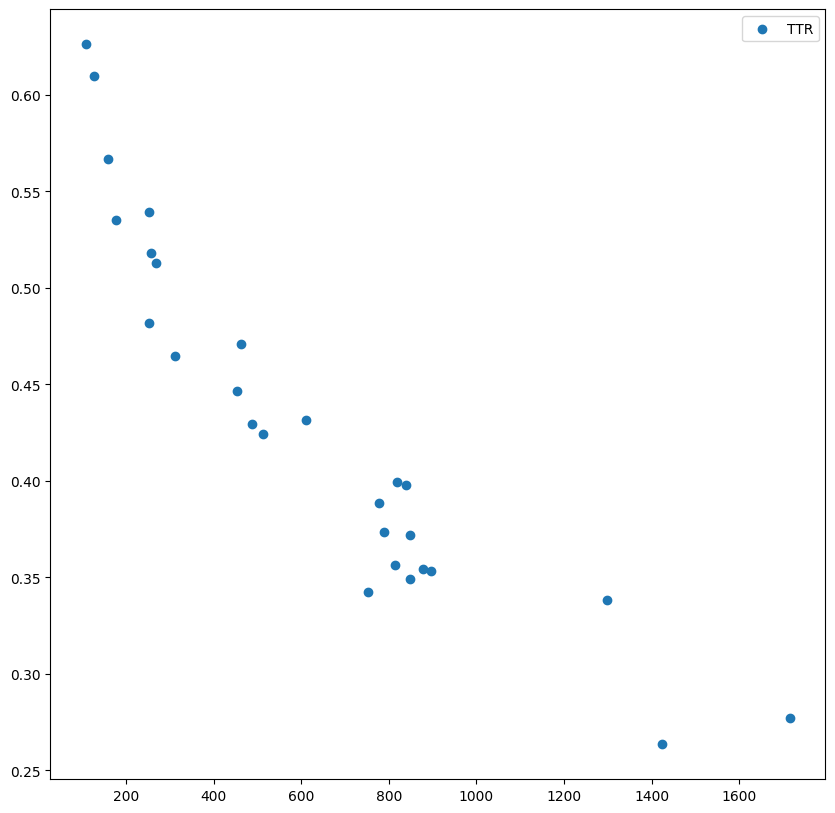

In [43]:
f = plt.figure(figsize=(10, 10))
plt.scatter(df2['N_Splits'],df2['TTR'],  label='TTR')
# plt.scatter(df2['N_Splits'],df2['LogTTR'],  label='LogTTR')
# plt.scatter(df2['N_Splits'],df2['MSTTR'],  label='MSTTR')
plt.legend()

### Linear regression of TTR and Length

In [44]:
# importing the required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

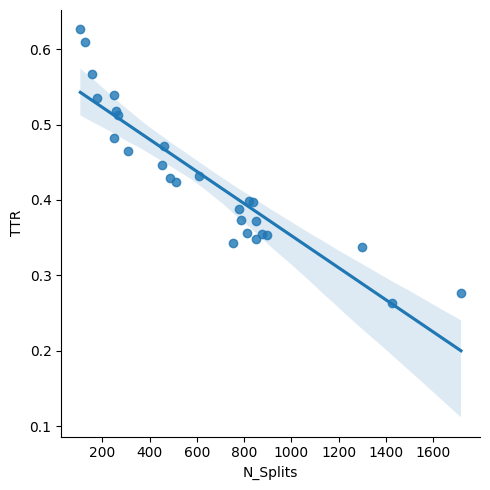

In [45]:
# # f = plt.figure(figsize=(10, 10))
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# data
df = df2

# scatter plot with regression
# line(by default)
sns.lmplot(x ='N_Splits', y ='TTR', data = df)

# Show the plot
plt.show()

<Axes: xlabel='N_Splits', ylabel='TTR'>

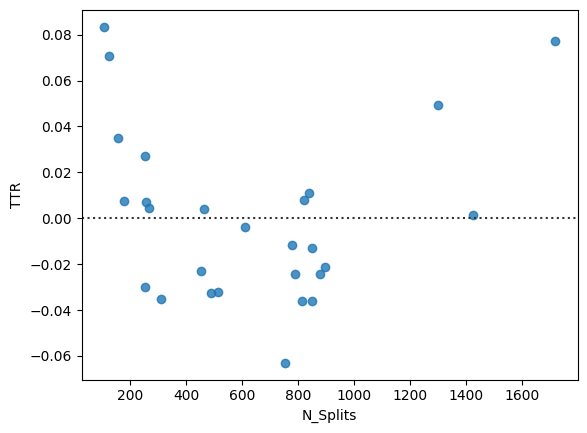

In [46]:
# Residual plots
sns.residplot(x ='N_Splits', y ='TTR', data = df2)

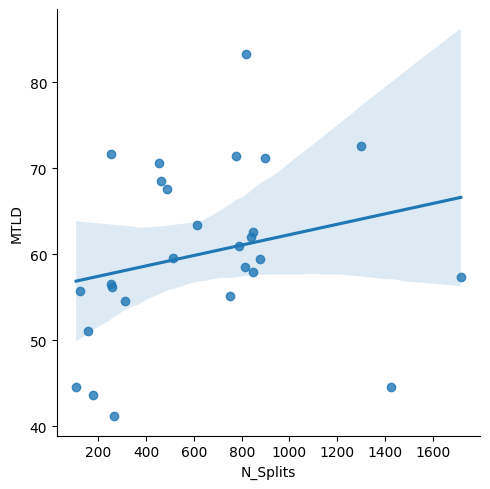

In [48]:
sns.lmplot(x ='N_Splits', y ='MTLD', data = df2)

# Show the plot
plt.show()

<Axes: xlabel='N_Splits', ylabel='MTLD'>

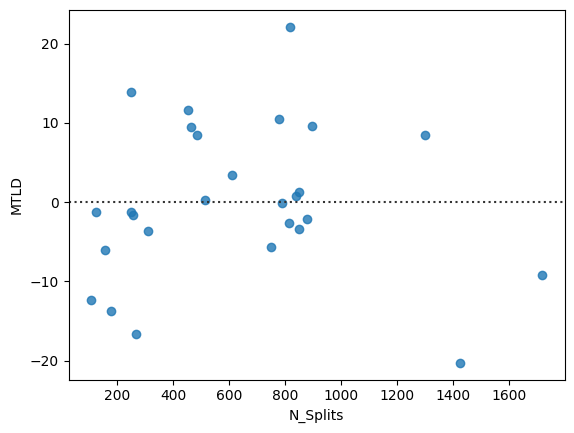

In [49]:
# Residual plots
sns.residplot(x ='N_Splits', y ='MTLD', data = df2)

In [50]:
import statsmodels.api as sm

X = df["N_Splits"]
y = df["TTR"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    TTR   R-squared (uncentered):                   0.520
Model:                            OLS   Adj. R-squared (uncentered):              0.501
Method:                 Least Squares   F-statistic:                              28.15
Date:                Thu, 16 May 2024   Prob (F-statistic):                    1.50e-05
Time:                        06:52:10   Log-Likelihood:                         -6.2666
No. Observations:                  27   AIC:                                      14.53
Df Residuals:                      26   BIC:                                      15.83
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
N_Splits       0.0004   7.97e-05      5.306      0.000       0.000       0.001
==============================================================================
Omnibus:                        0.839   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.760
Skew:                          -0.370   Prob(JB):                        0.684
Kurtosis:                       2.644   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
X = df["N_Splits"]
y = df["MTLD"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MTLD   R-squared (uncentered):                   0.730
Model:                            OLS   Adj. R-squared (uncentered):              0.720
Method:                 Least Squares   F-statistic:                              70.35
Date:                Thu, 16 May 2024   Prob (F-statistic):                    7.20e-09
Time:                        06:52:21   Log-Likelihood:                         -131.57
No. Observations:                  27   AIC:                                      265.1
Df Residuals:                      26   BIC:                                      266.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
N_Splits       0.0693      0.008      8.388      0.000       0.052       0.086
==============================================================================
Omnibus:                       11.580   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.227
Skew:                          -1.296   Prob(JB):                      0.00602
Kurtosis:                       4.540   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Boxplots

In [52]:
import seaborn as sns
import numpy as np

### Setting the figure size

In [ ]:
sns.set(rc={'figure.figsize':(12,8)}) #set width and height

<Axes: xlabel='chapter', ylabel='value'>

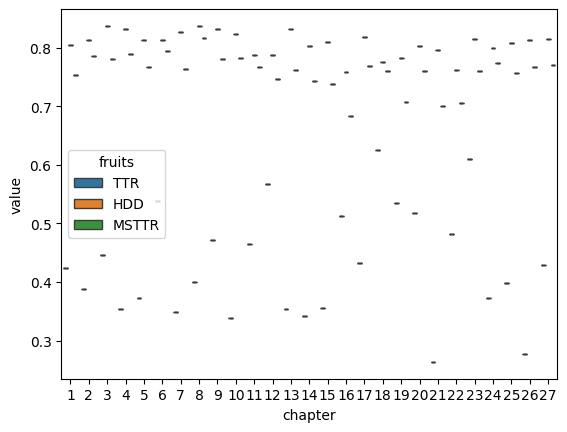

In [53]:
df = df2
df = df[['chapter','TTR','MSTTR','HDD','MTLD']]

dd=pd.melt(df,id_vars=['chapter'],value_vars=['TTR','HDD','MSTTR'],var_name='fruits')
sns.boxplot(x='chapter',y='value',data=dd,hue='fruits')

<ipython-input-54-54fb83aa86c9>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( labels_list, rotation=0 )


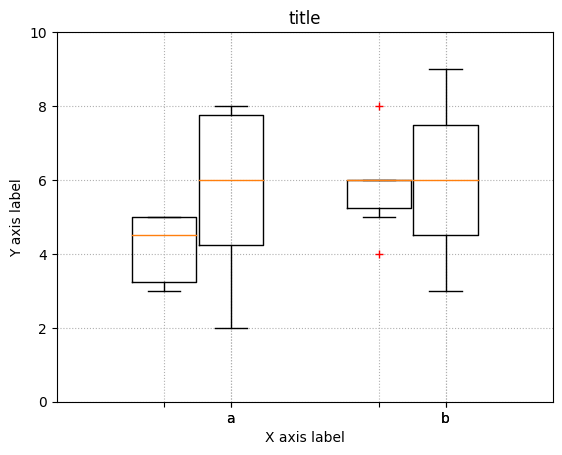

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# --- Your data, e.g. results per algorithm:
data1 = [5,5,4,3,3,5]
data2 = [6,6,4,6,8,5]
data3 = [7,8,4,5,8,2]
data4 = [6,9,3,6,8,4]

# --- Combining your data:
data_group1 = [data1, data2]
data_group2 = [data3, data4]

# --- Labels for your data:
labels_list = ['a','b']
xlocations  = range(len(data_group1))
width       = 0.3
symbol      = 'r+'
ymin        = 0
ymax        = 10

ax = plt.gca()
ax.set_ylim(ymin,ymax)
ax.set_xticklabels( labels_list, rotation=0 )
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)
ax.set_xticks(xlocations)
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('title')

# --- Offset the positions per group:
positions_group1 = [x-(width+0.01) for x in xlocations]
positions_group2 = xlocations

plt.boxplot(data_group1,
            sym=symbol,
            labels=['']*len(labels_list),
            positions=positions_group1,
            widths=width,
#           notch=False,
#           vert=True,
#           whis=1.5,
#           bootstrap=None,
#           usermedians=None,
#           conf_intervals=None,
#           patch_artist=False,
            )

plt.boxplot(data_group2,
            labels=labels_list,
            sym=symbol,
            positions=positions_group2,
            widths=width,
#           notch=False,
#           vert=True,
#           whis=1.5,
#           bootstrap=None,
#           usermedians=None,
#           conf_intervals=None,
#           patch_artist=False,
            )

plt.savefig('boxplot_grouped.png')
plt.savefig('boxplot_grouped.pdf')    # when publishing, use high quality PDFs
#plt.show()                   # uncomment to show the plot.

In [ ]:
dd = pd.melt(df3, id_vars = 'Year'],value_vars = ['TTR','HDD'],var_name='LD')
sns.boxplot(x = 'Year', y = 'value', data=dd, hue='LD')


SyntaxError: ignored

### MTLD grouped plots

In [ ]:
datatop = df2.tail()
datatop

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma,TTR,RTTR,...,FDTTR,MATTR,HDD,MTLD,BILOG,MA,MassTTR,MSTTR,MTLD_wrap,MTLD_bid
131,2022,Infer-Logic,Q36,"According to the market response model, it is ...",1035,"[According, to, the, market, response, model,,...",163,"[accord, to, the, market, response, model, it,...",0.570552,7.284322,...,0.813333,0.810877,0.803874,87.560227,79.687117,78.402729,0.049799,0.813333,79.687117,78.402729
132,2022,Infer-Logic,Q37,In spite of the likeness between the fictional...,1025,"[In, spite, of, the, likeness, between, the, f...",167,"[in, spite, of, the, likeness, between, the, f...",0.532934,6.887027,...,0.673333,0.690678,0.746895,35.844810,36.263473,35.668548,0.055324,0.673333,36.263473,35.668548
133,2022,Infer-Logic,Q38,Retraining current employees for new positions...,981,"[Retraining, current, employees, for, new, pos...",155,"[retraining, current, employee, for, new, posi...",0.574194,7.148652,...,0.793333,0.783962,0.804126,82.405437,73.432258,64.910794,0.050222,0.793333,73.432258,64.910794
134,2022,Infer-Logic,Q39,As long as the irrealism of the silent black a...,1068,"[As, long, as, the, irrealism, of, the, silent...",174,"[as, long, as, the, irrealism, of, the, silent...",0.574713,7.580980,...,0.773333,0.792000,0.797267,71.008388,69.804598,68.444683,0.047918,0.773333,69.804598,68.444683
135,2022,Context,Q40,Philip Kitcher and Wesley Salmon have suggeste...,1069,"[Philip, Kitcher, and, Wesley, Salmon, have, s...",154,"[philip, kitcher, and, wesley, salmon, have, s...",0.519481,6.446584,...,0.706667,0.688381,0.708912,39.029817,38.831169,34.360697,0.059439,0.706667,38.831169,34.360697


column names

In [ ]:
for col in df2.columns:
    print(col)

Year
Category
QN
Passage
String
Splits
N_Splits
Lemma
TTR
RTTR
LogTTR
MSTTR
FDTTR
MATTR
HDD
MTLD
BILOG
MA


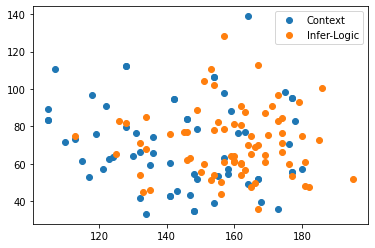

In [ ]:
groups = df2.groupby("Category")
for name, group in groups:
    plt.plot(group["N_Splits"], group["MTLD"], marker="o", linestyle="", label=name)
plt.legend()

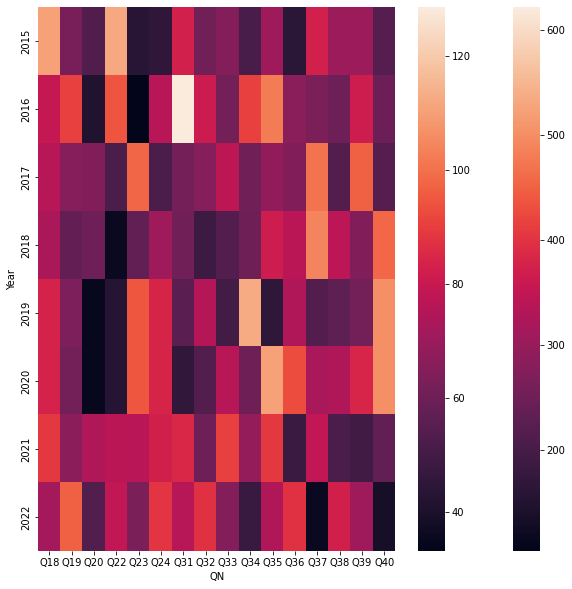

In [ ]:
f = plt.figure(figsize=(10, 10))
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

data = df2
data = data.pivot("Year", "QN", "MTLD")
ax = sns.heatmap(data)

In [ ]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


In [ ]:
df3

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma,TTR,RTTR,LogTTR,MSTTR,FDTTR,MATTR,HDD,MTLD,BILOG,MA
51,2019,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...",578,"[Dear, Mr., Reese,, A, few, days, ago,, I, sub...",105,"[dear, mr, reese, a, few, day, ago, i, submit,...",0.685714,7.026481,0.918931,0.040110,0.810,0.766786,0.810360,83.649431,76.466667,62.060588
34,2020,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...",578,"[Dear, Mr., Reese,, A, few, days, ago,, I, sub...",105,"[dear, mr, reese, a, few, day, ago, i, submit,...",0.685714,7.026481,0.918931,0.040110,0.810,0.766786,0.810360,83.649431,76.466667,62.060588
17,2021,Context,Q18,"Dear Friends,\nSeason_s greetings. As some of ...",611,"[Dear, Friends,, Season_s, greetings., As, som...",105,"[dear, friend, season, greeting, as, some, of,...",0.695238,7.124071,0.921894,0.038643,0.790,0.782500,0.836292,89.071602,75.857143,52.282982
119,2015,Context,Q18,One difference between winners and losers is h...,635,"[One, difference, between, winners, and, loser...",107,"[one, difference, between, winner, and, loser,...",0.728972,7.540545,0.932349,0.033336,0.790,0.794828,0.841506,110.542069,107.811321,0.000000
0,2022,Context,Q18,"Dear Ms. Green,\nMy name is Donna Williams, a ...",637,"[Dear, Ms., Green,, My, name, is, Donna, Willi...",110,"[dear, ms, green, my, name, be, donna, william...",0.600000,6.292853,0.891325,0.053236,0.790,0.763279,0.782583,71.694409,63.127273,57.933236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2019,Context,Q41,"Industrial capitalism not only created work, i...",1608,"[Industrial, capitalism, not, only, created, w...",254,"[industrial, capitalism, not, only, create, wo...",0.559055,8.909872,0.894984,0.043669,0.796,0.789366,0.822339,79.721184,84.039370,74.195627
7,2022,Context,Q41,Classifying things together into groups is som...,1429,"[Classifying, things, together, into, groups, ...",254,"[classify, thing, together, into, group, be, s...",0.531496,8.470653,0.885855,0.047465,0.756,0.742439,0.783105,58.513907,59.295276,53.015209
41,2020,Context,Q41,"Industrial capitalism not only created work, i...",1608,"[Industrial, capitalism, not, only, created, w...",254,"[industrial, capitalism, not, only, create, wo...",0.559055,8.909872,0.894984,0.043669,0.796,0.789366,0.822339,79.721184,84.039370,74.195627
126,2015,Context,Q41,Increased size affects group life in a number ...,1540,"[Increased, size, affects, group, life, in, a,...",257,"[increase, size, affect, group, life, in, a, n...",0.494163,7.922042,0.872972,0.052710,0.752,0.758558,0.786371,59.559458,57.607004,56.914059


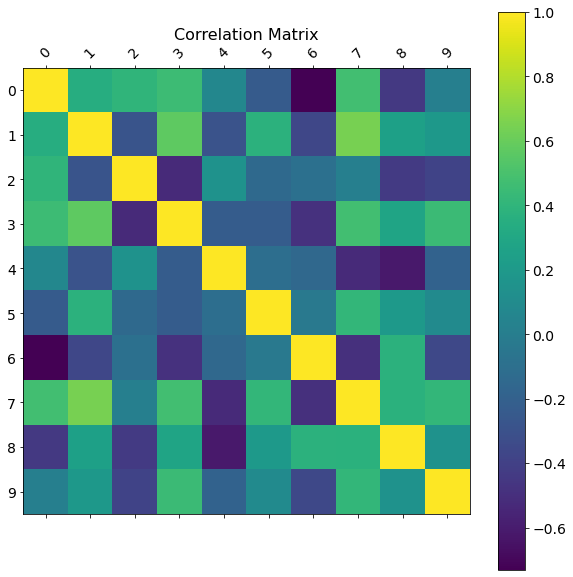

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442
1,0.791725,0.528895,0.568045,0.925597,0.071036,0.087129,0.020218,0.832620,0.778157,0.870012
2,0.978618,0.799159,0.461479,0.780529,0.118274,0.639921,0.143353,0.944669,0.521848,0.414662
3,0.264556,0.774234,0.456150,0.568434,0.018790,0.617635,0.612096,0.616934,0.943748,0.681820
4,0.359508,0.437032,0.697631,0.060225,0.666767,0.670638,0.210383,0.128926,0.315428,0.363711
5,0.570197,0.438602,0.988374,0.102045,0.208877,0.161310,0.653108,0.253292,0.466311,0.244426
6,0.158970,0.110375,0.656330,0.138183,0.196582,0.368725,0.820993,0.097101,0.837945,0.096098
7,0.976459,0.468651,0.976761,0.604846,0.739264,0.039188,0.282807,0.120197,0.296140,0.118728
8,0.317983,0.414263,0.064147,0.692472,0.566601,0.265389,0.523248,0.093941,0.575946,0.929296
9,0.318569,0.667410,0.131798,0.716327,0.289406,0.183191,0.586513,0.020108,0.828940,0.004695


In [ ]:
# df4 = df3.iloc[:, [6,8,9,10,11,12,13,14,15,16,17]]

In [ ]:
# import seaborn as sns; sns.set_theme()